Искусственный нейрон и однослойный перцептрон

Искусственный нейрон представляет собой упрощённую математическую модель, вдохновлённую работой биологического нейрона.
На вход нейрона подаётся набор значений x1, x2, ..., xn. Каждое из них умножается на соответствующий вес w1, w2, ..., wn,
после чего к сумме добавляется смещение (bias). Полученный результат преобразуется с помощью функции активации.

Математически работа нейрона описывается выражением:

                                                    y = f(w1x1 + w2x2 + b)
где
w — веса входов,
b — смещение,
f — функция активации (например, сигмоида, ReLU или гиперболический тангенс).


Однослойный перцептрон является базовой нейронной сетью, состоящей из одного слоя таких искусственных нейронов.
Каждый нейрон обрабатывает входные признаки и формирует одно выходное значение. При наличии нескольких нейронов их выходы
объединяются в вектор, который представляет результат работы модели.

Данный тип сети способен эффективно решать задачи линейной классификации, то есть случаи, когда классы можно разделить с
помощью прямой (или гиперплоскости в пространстве большей размерности). Вместе с тем однослойный перцептрон не справляется с
задачами, требующими нелинейного разделения данных, например с задачей XOR.

Обучение перцептрона основано на корректировке весов по правилу:

                                                w = w + η * (y_true - y_pred) * x 
где
η — коэффициент скорости обучения,
𝑦_true — истинное значение,
y_pred — значение, предсказанное моделью.

Таким образом, при наличии ошибки веса изменяются в направлении, уменьшающем расхождение между предсказанием и правильным ответом, что со временем улучшает качество классификации.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

Код нейрона

In [27]:
def linear_combination(x, weights, bias):
    return x @ weights + bias


def perceptron(x, weights, bias, activation_fn):
    z = linear_combination(x, weights, bias)
    return activation_fn(z)


Функции активации

In [28]:
def identity(x):
    return x


def step(x):
    return np.where(x >= 0, 1, 0)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def tanh(x):
    return np.tanh(x)


def arctan(x):
    return np.arctan(x)


def relu(x):
    return np.maximum(0, x)


def softsign(x):
    return x / (1 + np.abs(x))


def softplus(x):
    return np.log1p(np.exp(x))


def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)


activations = {
    "Identity": identity,
    "Step": step,
    "Sigmoid": sigmoid,
    "Tanh": tanh,
    "Arctan": arctan,
    "ReLU": relu,
    "Softsign": softsign,
    "Softplus": softplus,
    "Leaky ReLU": leaky_relu
}

Генерация и визуализация данных

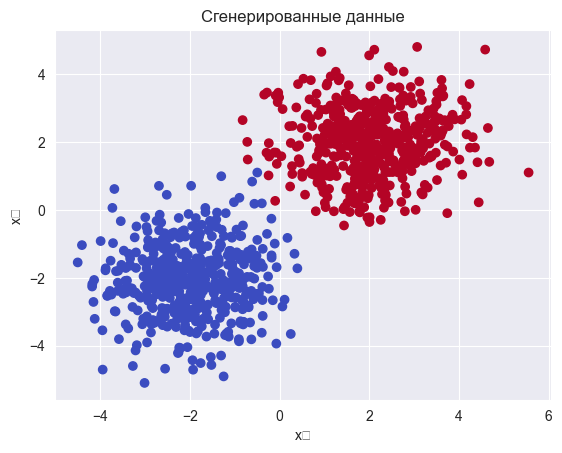

In [29]:
np.random.seed(45)
N = 500

class_a = np.random.randn(N, 2) + [-2, -2]
class_b = np.random.randn(N, 2) + [2, 2]

X = np.vstack([class_a, class_b])
y = np.hstack([np.zeros(N), np.ones(N)])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.title("Сгенерированные данные")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.show()

Обучение

In [31]:
def train_perceptron(X, y, lr, epochs, activation_fn, verbose=False):
    w = np.random.randn(X.shape[1])
    b = 0.0
    history = []

    for ep in range(epochs):
        for i in range(len(X)):
            output = perceptron(X[i], w, b, activation_fn)
            prediction = 1 if output >= 0.5 else 0
            error = y[i] - prediction

            w += lr * error * X[i]
            b += lr * error

        preds = perceptron(X, w, b, activation_fn)
        preds = (preds >= 0.5).astype(int)
        accuracy = (preds == y).mean()
        history.append(accuracy)

    return w, b, history

Визуализация результатов

In [33]:
def show_results(weights, bias, activation_fn, history, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 120),
        np.linspace(y_min, y_max, 120)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = perceptron(grid, weights, bias, activation_fn)
    Z = (Z >= 0.5).astype(int).reshape(xx.shape)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
    plt.title(f"Граница решений ({title})")

    plt.subplot(1, 2, 2)
    plt.plot(history, marker="o")
    plt.title("Точность по эпохам")
    plt.xlabel("Эпоха")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.05)

    plt.show()

Запуск экспериментов

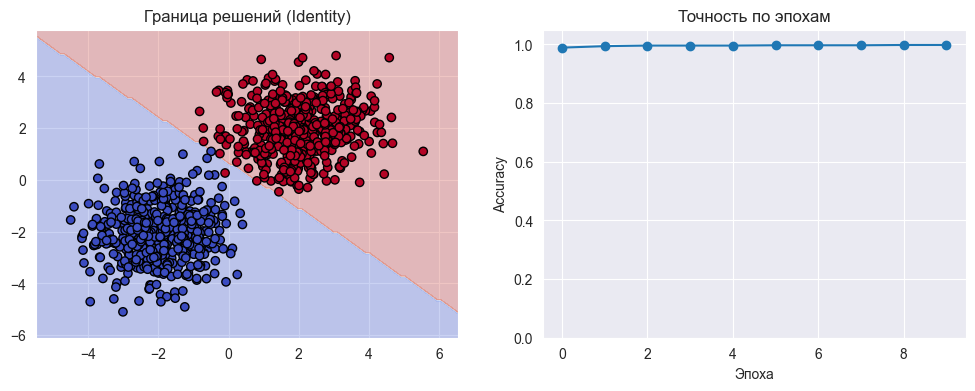

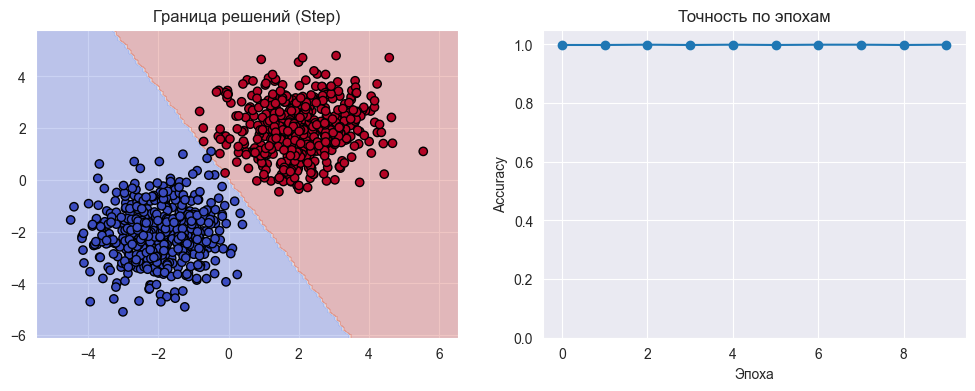

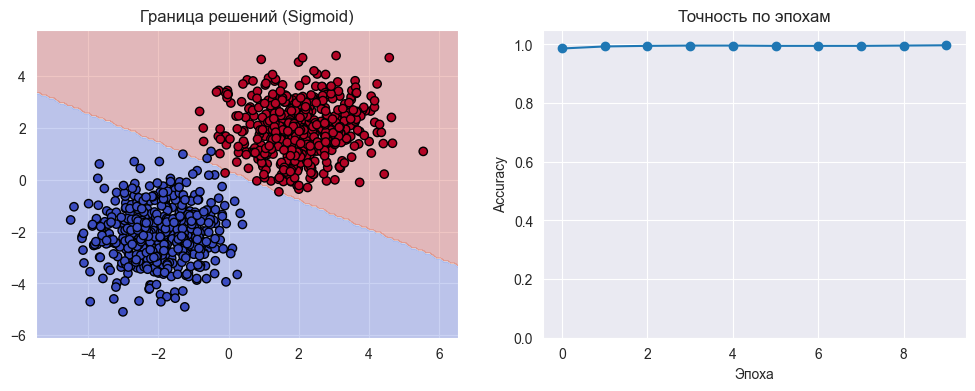

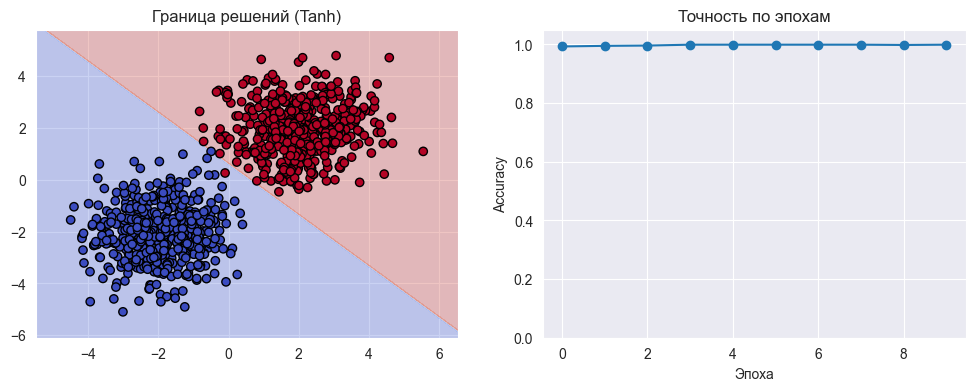

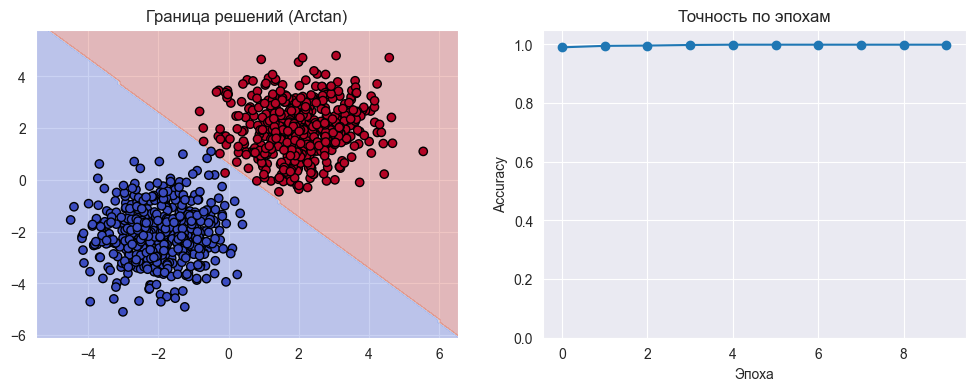

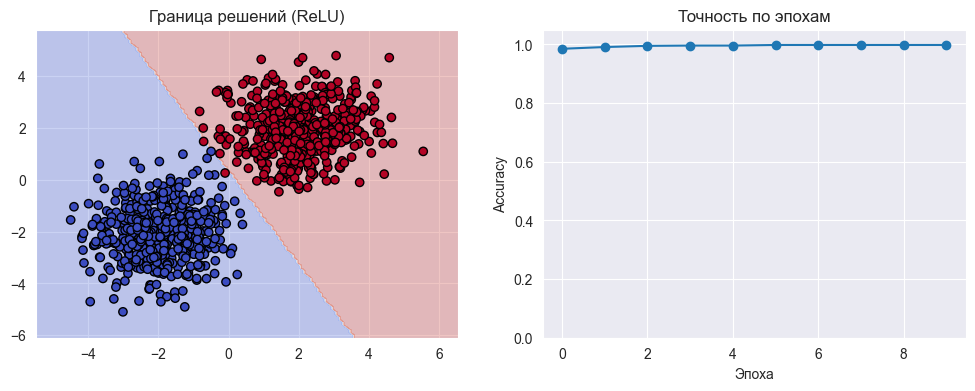

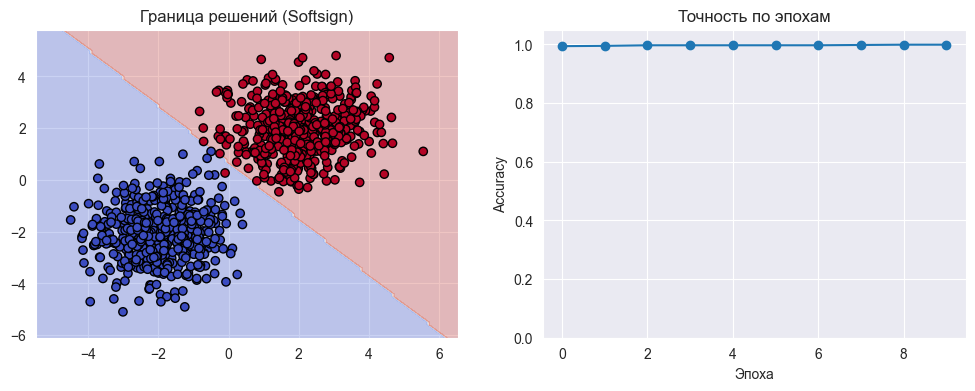

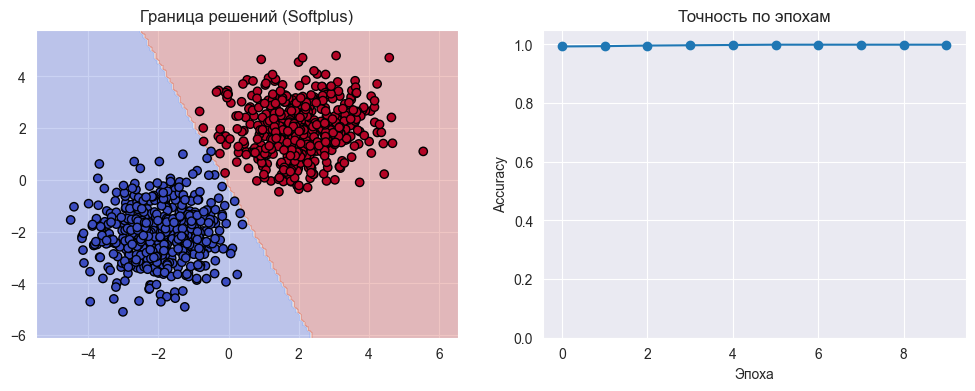

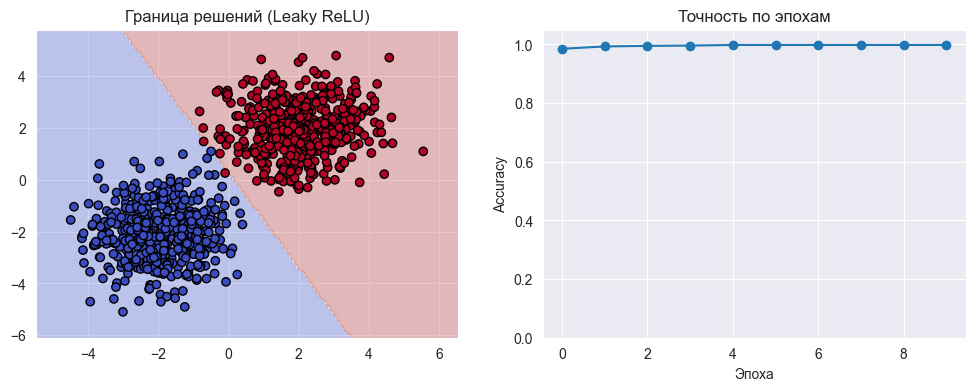

In [34]:
LR = 0.01
EPOCHS = 10
results = {}

for name, func in activations.items():
    w, b, acc_history = train_perceptron(X, y, LR, EPOCHS, func)
    show_results(w, b, func, acc_history, name)
    results[name] = acc_history[-1]

Итоговый график

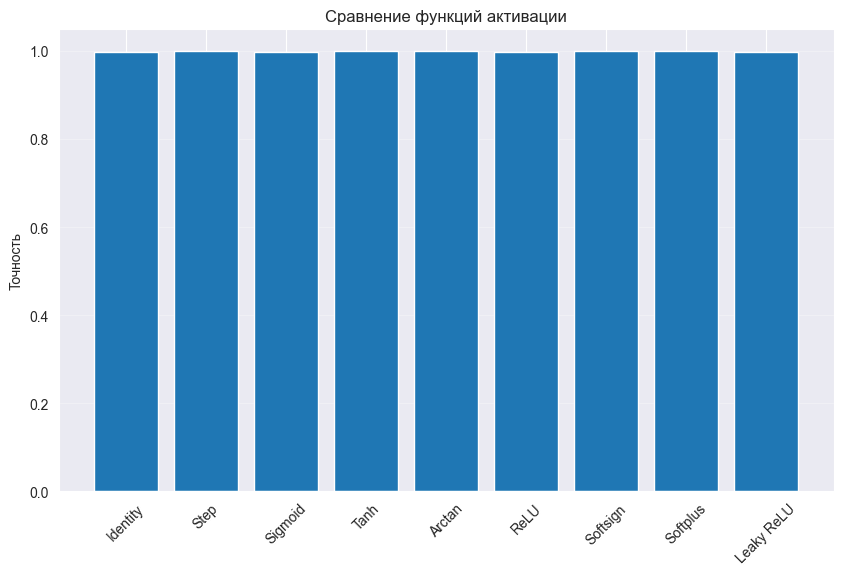

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title("Сравнение функций активации")
plt.ylabel("Точность")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.show()

1. Что делает функция активации в искусственном нейроне? 
Функция активации преобразует выход нейрона и добавляет нелинейность, что позволяет модели решать более сложные задачи.

2. Чем отличается искусственный нейрон от однослойного перцептрона? 
Искусственный нейрон — это один вычислительный элемент, а однослойный перцептрон это нейронная сеть, состоящая из одного слоя таких нейронов.
 
3. Какое правило используется для обучения перцептрона? 
Перцептрон обучается по правилу коррекции весов на основе ошибки предсказания.

4. Почему однослойный перцептрон не может решить задачу XOR? 
Потому что задача XOR не является линейно разделимой, а перцептрон строит только линейную границу.

5. Что произойдёт при замене сигмоиды на ReLU? 
Выход нейрона станет неограниченным сверху, а нейроны с отрицательными входами перестанут активироваться.